In [1]:
from gplearn.genetic import SymbolicRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy import spatial
import time
from sklearn.metrics import mean_absolute_error
import random
import math
import time

In [2]:
df = pd.read_csv('dengue_features_train.csv')

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,05-10-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,25-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
df_sj = df[:936]
df_sj.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
931,sj,2008,13,25-03-2008,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,01-04-2008,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,08-04-2008,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,15-04-2008,0.00180,NaN,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,22-04-2008,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [5]:
df_iq = df[936:]
df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,01-07-2000,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,08-07-2000,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,15-07-2000,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,22-07-2000,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,29-07-2000,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [6]:
X_iq = df.drop(['city','total_cases'], axis = 1)
X_iq.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,05-10-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,25-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
y_iq = df['total_cases']
y_iq.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_iq, y_iq, test_size=0.33, random_state=42)

In [9]:
def relu(x):
        return np.maximum(x, 0)
class EvolvableNetwork:

    # Layer Nodes is a list of int values denoting the number of nodes per layer
    # For example, if layer_nodes = [3, 5, 3], we have three hidden layers with a 3-5-3 node architecture
    # num_input and num_output refer to the number of input and output variables
    # I will explain the purpose of the Initialize boolean later, but simply if False, do not create the weight
    # and bias matrices
    
    def __init__(self, layer_nodes, num_input, num_output, initialize=True):
        self.layer_count = len(layer_nodes)
        self.layer_nodes = layer_nodes
        self.num_input = num_input
        self.num_output = num_output
        self.activation_function = relu

        self.layer_weights = []
        self.layer_biases = []

        if not initialize:  # I will discuss the purpose of this later
            return

        # create the NxM weight and bias matrices for input Layer
        self.layer_weights.append(
            np.random.uniform(-1, 1, num_input * layer_nodes[0]).reshape(num_input, layer_nodes[0]))
        self.layer_biases.append(np.random.uniform(-1, 1, layer_nodes[0]))

        # create the weight matrices for Hidden Layers
        for i in range(1, self.layer_count):
            self.layer_weights.append(
                np.random.uniform(-1, 1, layer_nodes[i-1]*layer_nodes[i]).reshape(layer_nodes[i-1], layer_nodes[i]))
            self.layer_biases.append(np.random.uniform(-1, 1, layer_nodes[i]).reshape(1, layer_nodes[i]))

        # Create the weight and bias matrices for output Layer
        self.layer_weights.append(
            np.random.uniform(-1, 1, layer_nodes[self.layer_count-1]*num_output).reshape(layer_nodes[self.layer_count-1],
                                                                                         num_output))
        self.layer_biases.append(np.random.uniform(-1, 1, num_output).reshape(1, num_output))

    def predict(self, x):  # same as forward pass, performs matrix multiplication of the weights
        output = self.activation_function(np.dot(x, self.layer_weights[0]) + self.layer_biases[0])
        for i in range(1, self.layer_count + 1):
            if i == self.layer_count:  # last layer so don't use activation function
                output = (np.dot(output, self.layer_weights[i]) + self.layer_biases[i])
            else:
                output = self.activation_function(
                    np.dot(output, self.layer_weights[i]) + self.layer_biases[i])
        if self.num_output == 1:  # if there is only one output variable then reshape
            return output.reshape(len(x), )
        return output


  MSE Val: 100.18846793904571
  MSE Val: 100.62130273080703
  MSE Val: 100.55022270167495
  MSE Val: 99.03725517363473
  MSE Val: 134.89643315445085
  MSE Val: 161.21733709395454
  MSE Val: 128.58218675954518
  MSE Val: 128.5563319198598

Best Validation Fitness Values Per Window Size:
Window Size: 3 - Validation MSE: 99.03725517363473
Window Size: 4 - Validation MSE: 99.03725517363473
Validation Error: Mean w/ std: 113.79679354674727+-14.759538373112527
Best Model: 
 Window Size : 3
 MSE for Test Data Set : 177.54431536613734


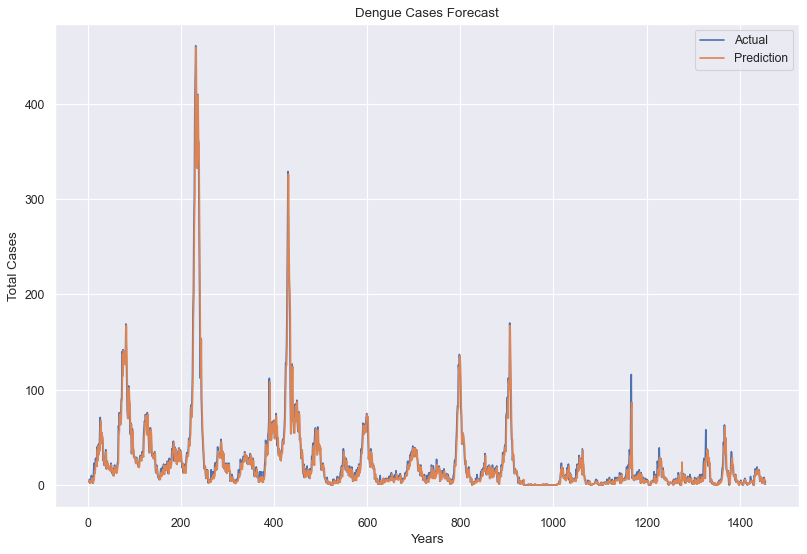

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor

f = pd.read_csv("dengue_features_train.csv")
y = np.asarray(df['total_cases'])
size = len(y)
# 50% of data for training
train_ind = int(size * 0.50)
# 25% of data for validation and other 25% for testing
val_ind = int(size * 0.75)



# testing Genetic Programming algorithm using gplearn

max_window = 4
min_window = 3
initial_population_size = 100  # 10 neural networks
best_models = []  # best model from each run of the algorithm per window size
best_fits = []
# randomly shuffle data through indices:
shuffled_indices = np.asarray(range(0, size-max_window))
np.random.shuffle(shuffled_indices)
# loop over each window size
for vision in range(min_window, max_window + 1):
    input = []
    output = []
    # creates the window length size for each value
    # because the first couple values will not have
    # a full window we skip them, that's why start
    # at i and not 0
    for j in range(vision, size):
        input.append(y[(j - vision):j].tolist())
        output.append(y[j])

    input = np.asarray(input)
    output = np.asarray(output)

    temp = np.column_stack((output, input))

    # instead of shuffle each time here, we shuffle once outside loop
    # so that all window sizes have the same final array
    temp = temp[shuffled_indices]

    output = temp[:, 0]
    input = temp[:, 1:]

    y_train = output[0:train_ind]
    y_val = output[train_ind:val_ind]
    y_test = output[val_ind:size]
    x_train = input[0:train_ind]
    x_val = input[train_ind:val_ind]
    x_test = input[val_ind:size]

    init_gen = []
    for i in range(0, initial_population_size):
        init_gen.append(EvolvableNetwork(layer_nodes=[5, 5, 5], num_input=vision, num_output=1, initialize=True))

    function_set = ['add', 'sub']
    temp_val = []
    temp_models = []
    for i in range(0, 4):
        gp = SymbolicRegressor()

        gp.fit(x_train, y_train)
        predictions = gp.predict(x_val)
        mse1 = mean_squared_error(y_val, predictions)
        print("  MSE Val: " + str(mse1))
        temp_val.append(mse1)
        temp_models.append(gp)
    best_index = np.argmin(temp_val)
    best_models.append(temp_models[best_index])
    best_fits.append(temp_val[best_index])

# get best model
best_index = np.argmin(best_fits)
best_model = best_models[best_index]

# recreate data with that window size
vision = best_index + min_window
input = []
output = []
for j in range(vision, size):
    input.append(y[(j - vision):j].tolist())
    output.append(y[j])
input = np.asarray(input)
output = np.asarray(output)
temp = np.column_stack((output, input))
temp = temp[shuffled_indices]
output_2 = temp[:, 0]
input_2 = temp[:, 1:]
y_test = output_2[val_ind:size]
x_test = input_2[val_ind:size]

# evaluate test data
mse_test = mean_squared_error(y_test, best_model.predict(x_test))
print("\nBest Validation Fitness Values Per Window Size:")
index = 0
for fit in best_fits:
    print("Window Size: {} - Validation MSE: {}".format(index+min_window, best_fits[0]))
    index += 1
print("Validation Error: Mean w/ std: {}+-{}".format(np.mean(best_fits), np.std(best_fits)))
print("Best Model: \n"
      " Window Size : {}\n"
      " MSE for Test Data Set : {}".format(best_index+3, mse_test))

from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

figure(figsize=(12, 8), dpi=80)
xaxis = range(vision, len(y))
df_sj.set_index('year', inplace=True)
plt.plot(xaxis, y[vision:], label="Actual")
plt.plot(xaxis, best_model.predict(input), label="Prediction")
plt.xlabel("Years")
plt.ylabel("Total Cases")
plt.title("Dengue Cases Forecast")
plt.legend()
plt.show()